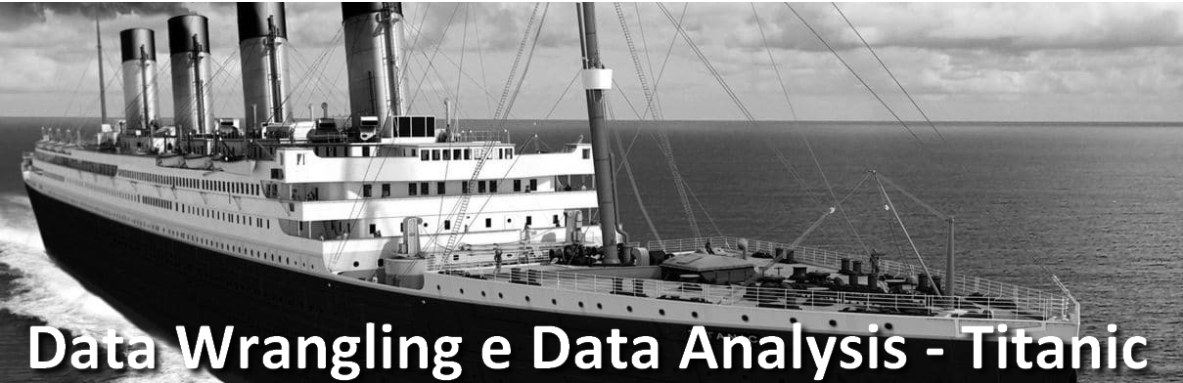

***

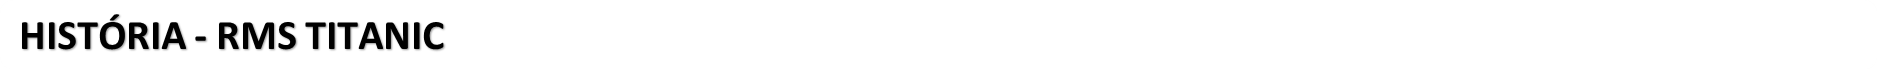

***
O **RMS Titanic** foi um navio de passageiros britânico, projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews. Sua construção começou em março de 1909 e seu lançamento ao mar ocorreu em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton com destino a Nova Iorque em 10 de abril de 1912. Colidiu com um iceberg na proa dianteira do lado direito às 23h40 de 14 de abril, naufragando na madrugada do dia seguinte, com mais de 1.500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos do projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, acarretando mudanças nas leis internacionais de navegação, que permanecem em vigor mais de um século depois.

Os destroços do Titanic foram procurados por décadas até serem encontrados, em 1985, por uma equipe liderada por Robert Ballard. Ele se encontra a 3.843 metros de profundidade e a 650 quilômetros ao sudeste de Terra Nova, no Canadá. Sua história e naufrágio permanecem no imaginário popular, levando à produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic, de 1997. Até hoje é um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

*Fonte: https://pt.wikipedia.org/wiki/RMS_Titanic*
***

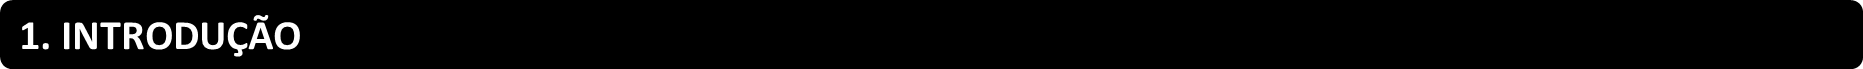

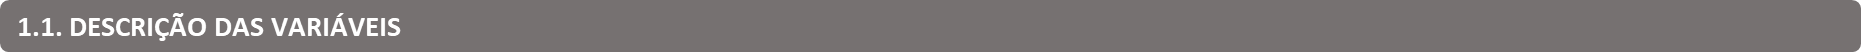

***
|   **Variável**  |                                      **Descrição**                                      |
|:---------------:|:---------------------------------------------------------------------------------------:|
| **PassengerID** |                 Número de identificação do passageiro na base de dados.                 |
|   **Survived**  | Variável *target*, informa se o passageiro sobreviveu ao desastre. (0 = Não \| 1 = Sim) |
|    **Pclass**   |                        Indica a classe do bilhete do passageiro.                        |
|     **Name**    |                               Nome completo do passageiro.                              |
|     **Sex**     |                                  Gênero do passageiro.                                  |
|     **Age**     |                                   Idade do passageiro.                                  |
|    **SibSp**    |                       Quantidade de cônjuges e/ou irmãos a bordo.                       |
|    **Parch**    |                         Quantidade de pais e/ou filhos a bordo.                         |
|    **Ticket**   |                             Número do bilhete do passageiro.                            |
|     **Fare**    |                         Preço da passagem paga pelo passageiro.                         |
|    **Cabin**    |                        Número da cabine associada ao passageiro.                        |
|   **Embarked**  |  Porto de embarque do passageiro. (C = Cherbourg \| Q = Queenstown \| S = Southampton)  |

***




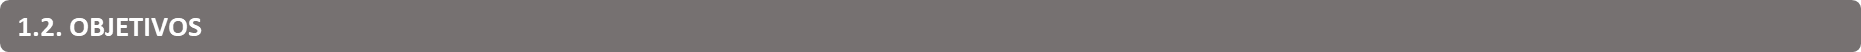

**Efetuar uma análise exploratória dos dados e ao final ser capaz de responder as seguintes questões:**

1. Qual foi o gênero que obteve um maior sucesso na chance de sobrevivência?
1. Qual é a faixa etária que teve maiores chances de sobreviver?
1. Das três classes disponíveis na embarcação, qual teve a maior chance de sobreviência?

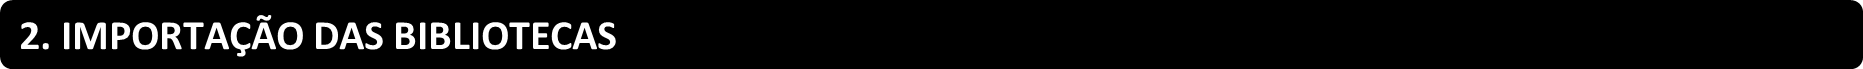

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

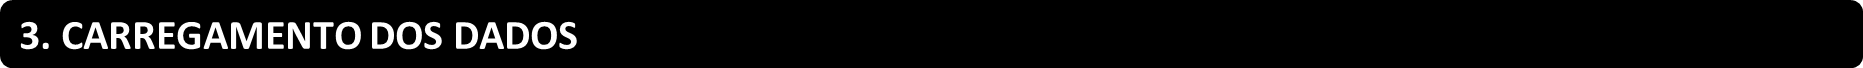

In [2]:
dfTitanic = pd.read_csv('baseTitanic.csv')

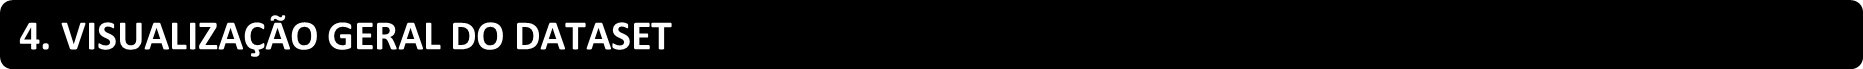

In [3]:
# Visualização das primeiras 2 linhas do Dataset
dfTitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
print(f'O Dataset possui \033[1m{dfTitanic.shape[0]} linhas\033[0m e \033[1m{dfTitanic.shape[1]} colunas\033[0m.')

O Dataset possui 891 linhas e 12 colunas.


In [5]:
# Visualização básica das features do Dataset
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('-'*75, '\n', '\033[1mVariáveis Numéricas\033[0m'.center(75))
display(dfTitanic.describe())
print('-'*75, '\n', '\033[1mVariáveis Categóricas\033[0m'.center(75))
display(dfTitanic.describe(include='O'))

--------------------------------------------------------------------------- 
                         Variáveis Numéricas                        


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


--------------------------------------------------------------------------- 
                        Variáveis Categóricas                       


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


***
* **Nota-se que não há homônimos na base de dados;**
* **A maioria das pessoas viajavam sozinhas;**
* **Haviam crianças de colo no navio;**
* **Cerca de 65% dos passageiros eram do sexo masculino;**
* **Há valores ausentes nas colunas 'Age', 'Cabin' e 'Embarked', que serão tratados mais adiante; e**
* **A maioria das pessoas (72%) embarcou no porto de Southampton.**
***

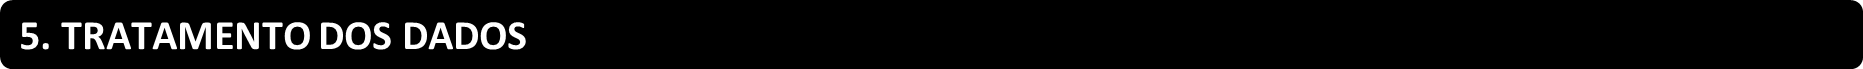

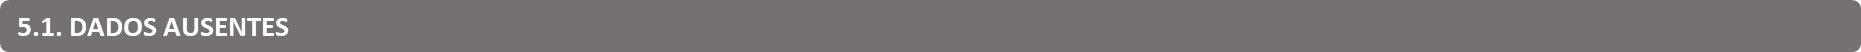

In [7]:
# Ordenação das colunas por quantidade de valores ausentes.
dfTitanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

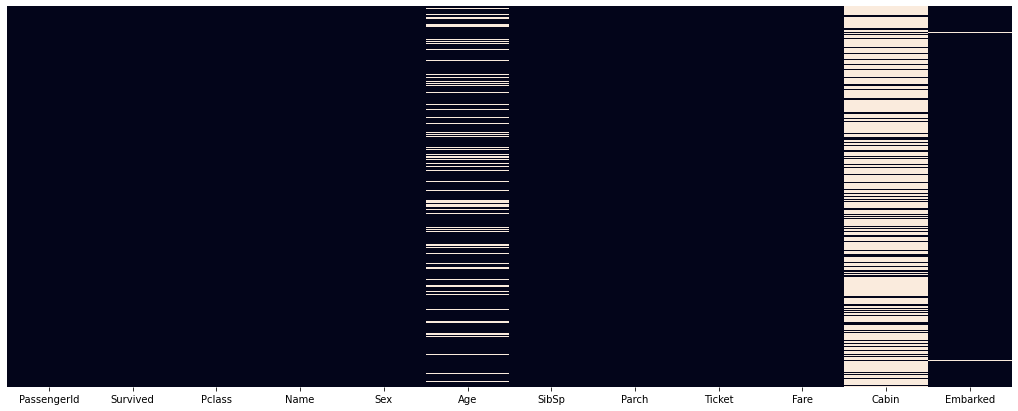

In [8]:
# Exibição dos valores ausentes plotados no gráfico de calor.
plt.figure(figsize=(18,7))
sns.heatmap(dfTitanic.isnull(), cbar=False, yticklabels='');

***
**Podemos notar uma enorme quantidade de valores ausentes na coluna '*Cabin*' seguida da coluna '*Age*' e poucos valores ausentes na coluna '*Embarked*'.**
***

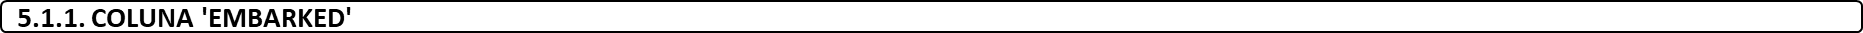

In [9]:
# Vamos checar os registros com valores ausentes referentes à coluna 'Embarked'.
dfTitanic[dfTitanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
# Verificando se há corresponsência na base de dados dos valores 'Ticket' ou 'Cabin'.
ticket = dfTitanic.Ticket[dfTitanic.Embarked.isnull()].iloc[0]
cabin = dfTitanic.Cabin[dfTitanic.Embarked.isnull()].iloc[0]
dfTitanic[(dfTitanic['Embarked'].notnull()) & ((dfTitanic['Ticket'] == ticket) | (dfTitanic.Cabin == cabin))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


***
**Observa-se que ambos os passageiros, muito provavelmente, embarcaram no mesmo porto, uma vez que as variáveis *'Ticket'* e *'Cabin'* são idênticas entre eles. Como a busca por registros semelhantes não retornou nenhum resultado, optei por substituir os valores ausentes pela MODA da coluna em questão, no caso o valor 'S', correspondente ao porto de embarque: 'Southampton'.**
***

In [11]:
# Atribuição do valor da moda aos valores ausentes da coluna 'Embarked'.
dfTitanic.Embarked.fillna(dfTitanic.Embarked.mode()[0], inplace=True)

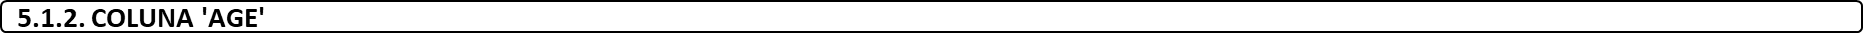

In [12]:
# Contagem e exibição dos valores ausentes referentes à coluna 'Age'
ageM = dfTitanic.Age[dfTitanic.Sex == 'male'].isnull().sum()
ageF = dfTitanic.Age[dfTitanic.Sex == 'female'].isnull().sum()
print(f'Há {ageM} idades de homens ausentes e {ageF} de mulheres, totalizando \033[1m{ageM + ageF} valores ausentes\033[0m.')

Há 124 idades de homens ausentes e 53 de mulheres, totalizando 177 valores ausentes.


In [13]:
# Determinando a mediana baseada nas colunas 'Pclass' e 'Sex' do passageiro correspondente.
medianaIdade = round(dfTitanic.groupby(['Pclass', 'Sex']).Age.median(), 0)
medianaIdade

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [14]:
# Criação e aplicação da função que percorrerá o Dataset substituindo os valores ausentes pela mediana correspondente à Classe e ao Sexo.
def substituirNaN(linha):
    if pd.isnull(linha.Age):
        return medianaIdade[linha['Pclass'], linha['Sex']]
    else:
        return linha['Age']
dfTitanic.Age = dfTitanic.apply(substituirNaN, axis=1)

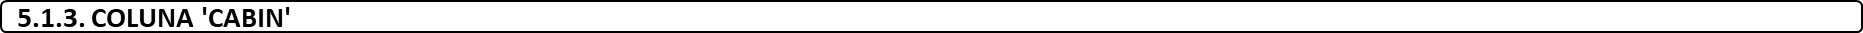

In [15]:
# Verificando a porcentagem de valores ausentes referentes à coluna 'Cabin'
print(f'\033[1m{round(dfTitanic.Cabin.isnull().sum() / dfTitanic.shape[0] * 100, 2)} % de valores ausentes.\033[0m')

77.1 % de valores ausentes.


In [16]:
# Remoção da coluna 'Cabin'
dfTitanic.drop('Cabin', axis=1, inplace=True)

***
**Optei pela remoção da coluna *'Cabin'*, uma vez que a existência de mais de 75% de valores ausentes certamente comprometerão as futuras análises e/ou aplicações de algoritmos de *Machine Learning*.**
***

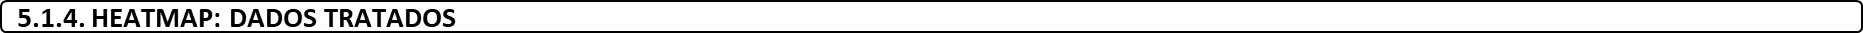

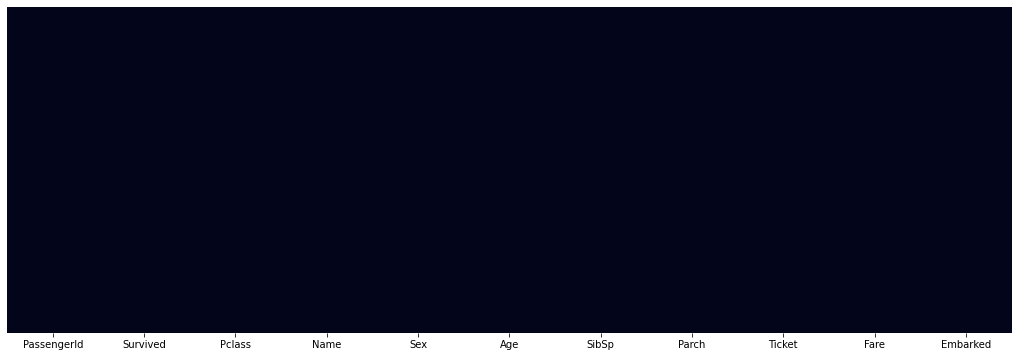

In [17]:
plt.figure(figsize=(18,6))
sns.heatmap(dfTitanic.isnull(), cbar=False, yticklabels='');

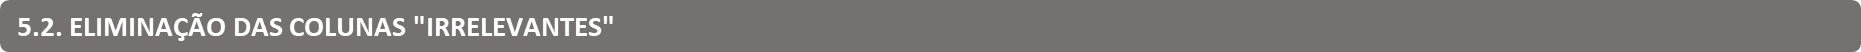

In [18]:
# Exclusão das colunas abaixo, uma vez que julgo não serem necessárias para as próximas etapas.
features = ['PassengerId', 'Name', 'Ticket']
dfTitanic.drop(features, axis=1, inplace=True)
dfTitanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


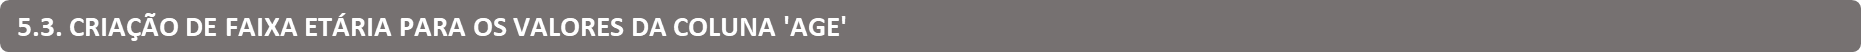

In [19]:
# Optei pela criação de grupos com a Faixa Etária dos passageiros, para melhor visualização dos gráficos na etapa 6.
rangeIdade = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
dfTitanic['RangeAge'] = pd.cut(dfTitanic.Age, range(0, 81, 10), right=False, labels=rangeIdade)
# Há um passageiro com mais de 79 anos, irei colocá-lo na categoria 70-79
dfTitanic.fillna('70-79', inplace=True)

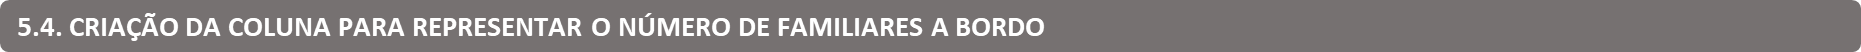

In [20]:
# Criação da coluna NumberRelatives, gerada a partir da soma dos parentes do passageiro a bordo.
dfTitanic['NumberRelatives'] = dfTitanic.SibSp + dfTitanic.Parch
dfTitanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)

***
**Como destacado anteriormente, a criação das colunas *'RangeAge'* e *'NumberRelatives'* fora realizada para facilitar a análise e a visualização dos dados no gráficos que serão expostos na próxima etapa.**

**Após a conclusão do processo de *Data Wrangling*, acredito que o *Dataset* esteja adequado para começarmos a efetuar a Análise Exploratória dos Dados.**
***

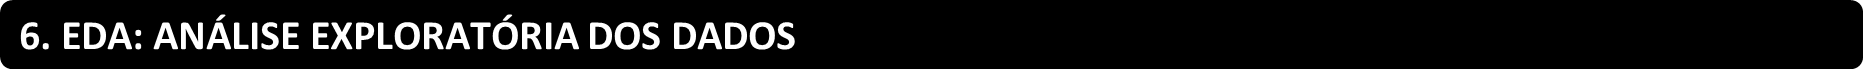

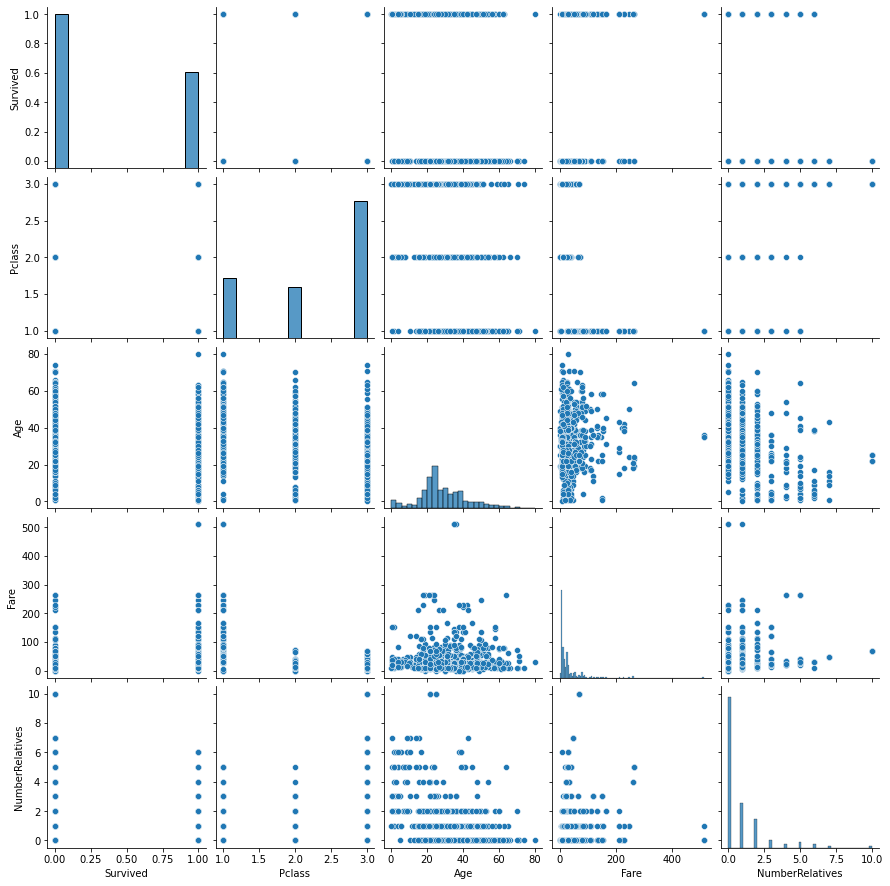

In [21]:
# Verificando a distribuição dos dados.
sns.pairplot(data=dfTitanic);

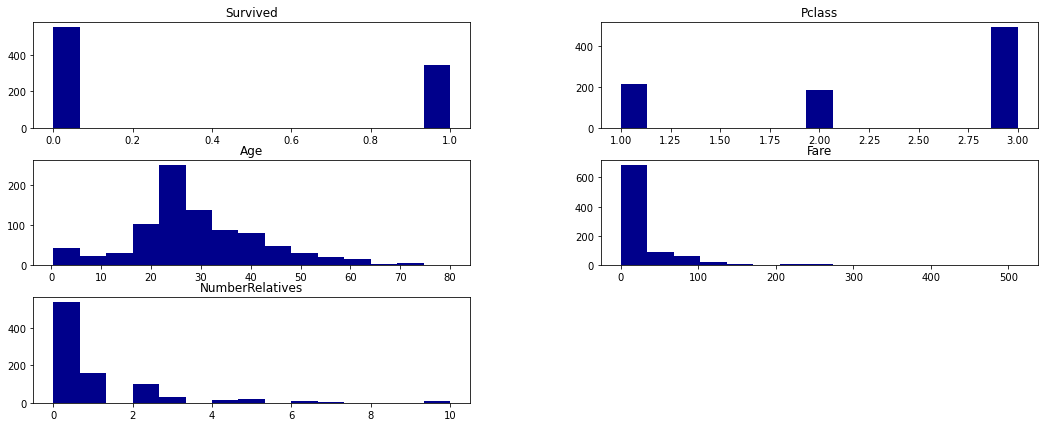

In [22]:
# Criação de histogramas.
dfTitanic.hist(bins=15, color='darkblue', figsize=(18,7), grid=False );

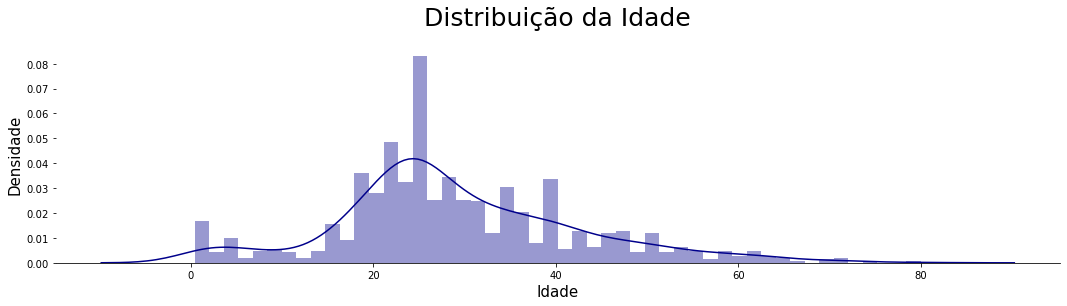

In [23]:
# Visualizando melhor o histograma da coluna 'Age'.
fig, ax = plt.subplots(figsize=(18, 4))
sns.distplot(dfTitanic.Age, color='darkblue', bins=50)
plt.title('Distribuição da Idade', fontsize=25, pad=20)
plt.xlabel('Idade', fontsize=15), plt.ylabel('Densidade', fontsize=15)
for axis in ['top', 'left', 'right']:    ax.spines[axis].set_color(None)
plt.show()

***
**De acordo com a imagem acima, podemos observar uma maior concentração dos dados em passageiros cujas idades estejam entre 20 e 26 anos.**
***

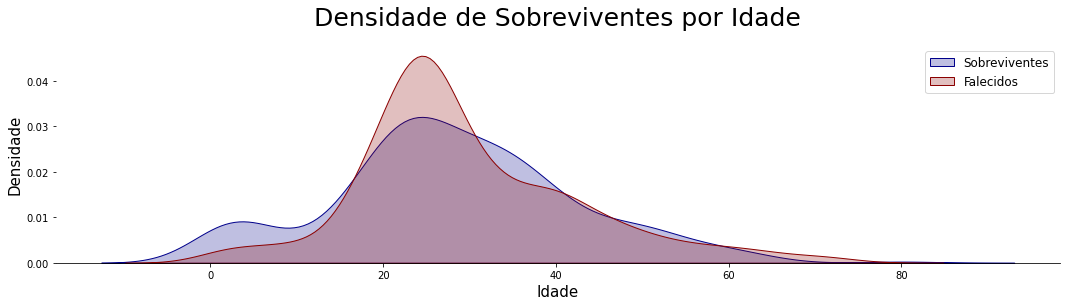

In [24]:
# Gráfico de densidade de Sobreviventes por Idade.
fig, ax = plt.subplots(figsize=(18, 4))
sns.kdeplot(dfTitanic.Age[dfTitanic.Survived == 1], color='darkblue', shade=True)
sns.kdeplot(dfTitanic.Age[dfTitanic.Survived == 0], color='darkred', shade=True)
plt.legend(['Sobreviventes', 'Falecidos'], fontsize=12)
plt.title('Densidade de Sobreviventes por Idade', fontsize=25, pad=20)
plt.xlabel('Idade', fontsize=15), plt.ylabel('Densidade', fontsize=15)
for axis in ['top', 'left', 'right']:    ax.spines[axis].set_color(None)
plt.show()

***
**O gráfico deixa evidente que a maior parte das pessoas que não sobreviveram à tragédia, segue a linha de tendência da idade, concentrado entre as idades entre 20 e 40 anos, com o pico batendo em cerca de 26 anos.**
***

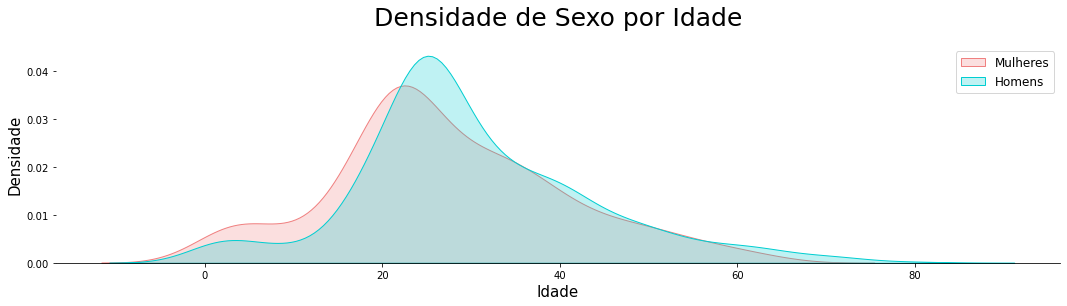

In [25]:
# Gráfico de densidade de Sobreviventes por Sexo.
fig, ax = plt.subplots(figsize=(18, 4))
sns.kdeplot(dfTitanic.Age[dfTitanic.Sex == 'female'], color='lightcoral', shade=True)
sns.kdeplot(dfTitanic.Age[dfTitanic.Sex == 'male'], color='darkturquoise', shade=True)
plt.legend(['Mulheres', 'Homens'], fontsize=12)
plt.title('Densidade de Sexo por Idade', fontsize=25, pad=20)
plt.xlabel('Idade', fontsize=15), plt.ylabel('Densidade', fontsize=15)
for axis in ['top', 'left', 'right']:    ax.spines[axis].set_color(None)
plt.show()

***
**Com a visualização do gráfico acima, podemos observar que em geral os passageiros do sexo feminino são mais jovens do que os passageiros do sexo masculino.**
***

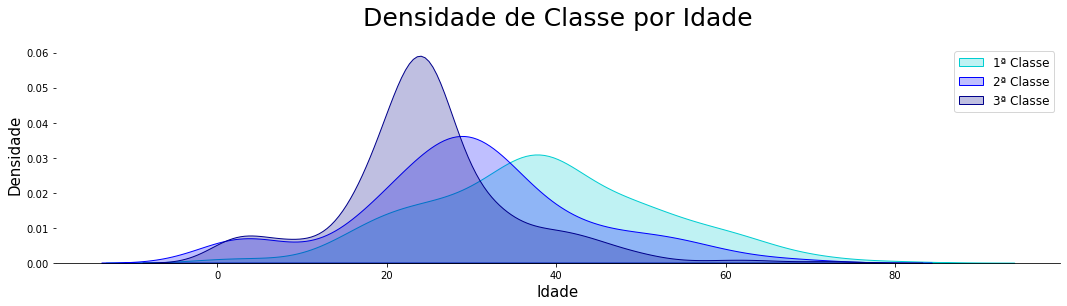

In [26]:
# Gráfico de densidade de Classes por Idade.
fig, ax = plt.subplots(figsize=(18, 4))
sns.kdeplot(dfTitanic.Age[dfTitanic.Pclass == 1], color='darkturquoise', shade=True)
sns.kdeplot(dfTitanic.Age[dfTitanic.Pclass == 2], color='blue', shade=True)
sns.kdeplot(dfTitanic.Age[dfTitanic.Pclass == 3], color='darkblue', shade=True)
plt.legend(['1ª Classe', '2ª Classe', '3ª Classe'], fontsize=12)
plt.title('Densidade de Classe por Idade', fontsize=25, pad=20)
plt.xlabel('Idade', fontsize=15), plt.ylabel('Densidade', fontsize=15)
for axis in ['top', 'left', 'right']:    ax.spines[axis].set_color(None)
plt.show()

***
**Duas considerações importantes podem ser reparadas por meio da análise do gráfico acima:**
* Quanto maior a idade, mais 'Alta' é a classe do passageiro; e
* Haviam poucas crianças e adolescentes na 1ª Classe.
***

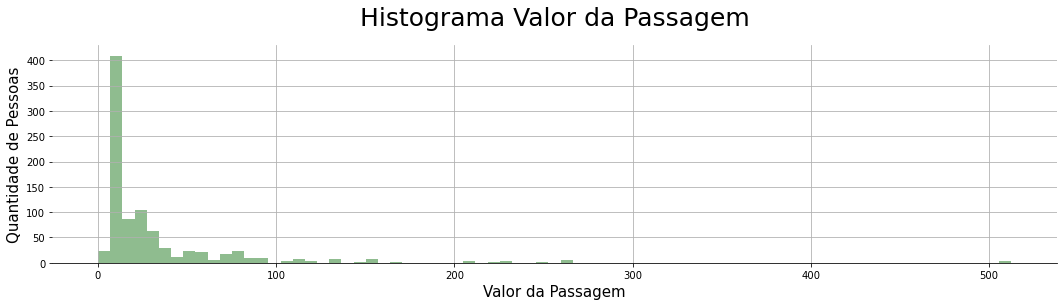

In [27]:
# Histograma do valor da tarifa.
fig, ax = plt.subplots(figsize=(18, 4))
dfTitanic.Fare.hist(bins=75, grid=True, color='darkseagreen')
plt.title('Histograma Valor da Passagem', fontsize=25, pad=20)
plt.xlabel('Valor da Passagem', fontsize=15), plt.ylabel('Quantidade de Pessoas', fontsize=15)
for axis in ['top', 'left', 'right']:    ax.spines[axis].set_color(None)    
plt.show()

In [42]:
# Valor médio do Ticket.
print(f'O \033[1mpreço médio\033[0m pago por um bilhete foi: \033[1m{round(dfTitanic.Fare.mean(), 2)}\033[0m.')

O preço médio pago por um bilhete foi: 32.2.


In [29]:
# Verificando os passageiros que pagaram mais de 500 pela passagem.
dfTitanic[dfTitanic.Fare >= 500]

,Survived,Pclass,Sex,Age,Fare,Embarked,RangeAge,NumberRelatives
258,1,1,female,35.0,512.3292,C,30-39,0
679,1,1,male,36.0,512.3292,C,30-39,1
737,1,1,male,35.0,512.3292,C,30-39,0


***
**A maioria dos passageiros pagou menos de 40 pela passagem. Observa-se casos isolados nos quais passageiros desembolsaram um valor de até 15 vezes o valor do ticket médio (32.2), todos fazendo parte da 1ª Classe, como exposto na tabela acima.**
***

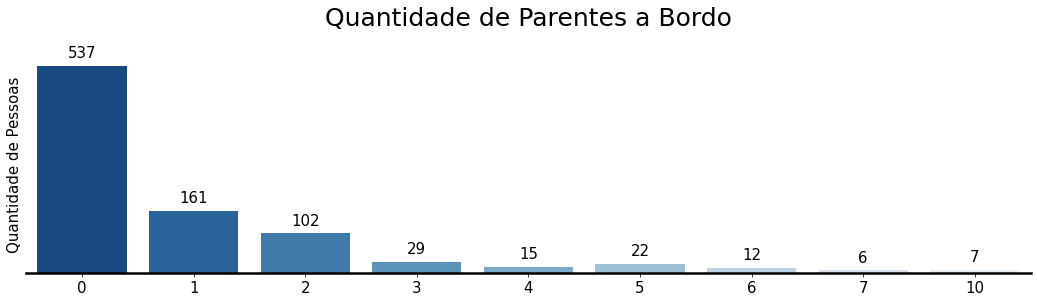

In [30]:
# Número de parentes a bordo.
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot('NumberRelatives', data=dfTitanic, palette='Blues_r', )
plt.title('Número de parentes a bordo', fontsize=25, pad=20)

ax.set_xlabel(''), ax.set_ylabel('Quantidade de Pessoas', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=15)
ax.set_title('Quantidade de Parentes a Bordo', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()+20),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=15)    
plt.show()

***
**Mais de 60% dos passageiros viajavam sozinhos. Fora esta quantidade, o número mais comum de familiares a bordo da embarcação variava entre 1 e 3.**
***

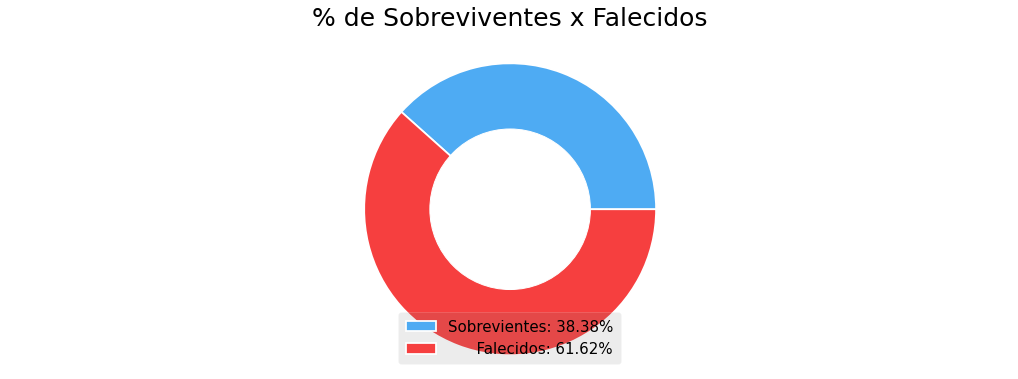

In [31]:
percSobreviventes = round(dfTitanic.Survived.sum() / dfTitanic.shape[0] * 100, 2)
dfPercSobreviventes = pd.DataFrame()
dfPercSobreviventes['Perc'] = 0
dfPercSobreviventes.loc['Sobrevivente'] = percSobreviventes
dfPercSobreviventes.loc['Falecido'] = 100 - percSobreviventes
listalabels = [f'Sobrevientes: {percSobreviventes}%', f'      Falecidos: {100-percSobreviventes}%']

fig, ax = plt.subplots(figsize=(18, 6))
plt.pie(dfPercSobreviventes.Perc, wedgeprops={'linewidth':1.75, 'edgecolor': 'w'}, colors=['#4eabf3' ,'#f63f3f'])
ax.set_title('% de Sobreviventes x Falecidos', fontsize=25, pad=20)
circulo = plt.Circle((0,0), 0.55, color='w')
ax.add_artist(circulo)
ax.legend(listalabels, loc=8, fontsize=15, borderpad = 0.5, labelspacing = 0.5, edgecolor = 'w', 
           facecolor = 'gray', framealpha = 0.15)
plt.axis('equal')
plt.show();

***
**De acordo com os dados no Dataset cerca de 2/3 dos passageiros faleceu no desastre. Por ser apenas uma amostra, realizei uma consulta em registros históricos e constatei que realmente, 68.1% dos passageiros do RMS Titanic não sobreviveu à tragédia.**
***

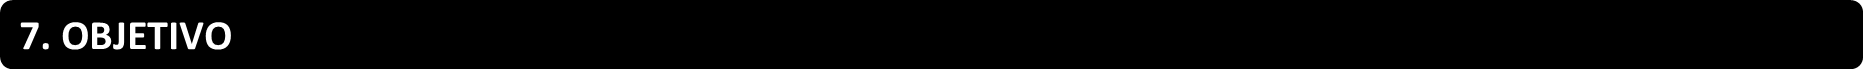

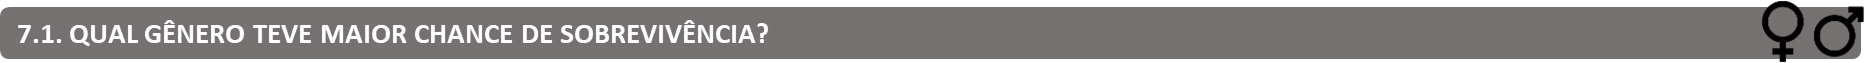

> Será que as mulheres tiveram mais chances de obreviver do que os homens? Verificaremos esta hipótese a seguir.

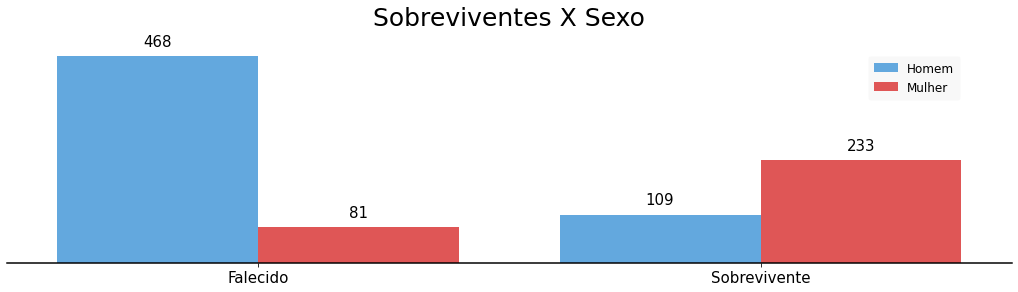

In [32]:
# Gráfico de sobreviventes de acordo com o sexo
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot('Survived', data=dfTitanic, hue='Sex', palette=['#4eabf3' ,'#f63f3f'])
plt.legend(['Homem', 'Mulher'], borderpad = 0.5, labelspacing = 0.5, edgecolor = 'w',
           facecolor = 'gray', framealpha = 0.05, fontsize=12, loc=0, bbox_to_anchor=(0.955,0.98))
ax.set_xlabel(''), ax.set_ylabel('', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=15)
x_ticks_labels = ['Falecido','Sobrevivente']
ax.set_xticklabels(x_ticks_labels, fontsize=15)
ax.set_title('Sobreviventes X Sexo', fontsize=25, pad=20)
ax.spines['bottom'].set_linewidth(1.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,10),
    textcoords='offset points', fontsize=15)    
plt.show()

In [33]:
# Exibição das tabelas com a quantidade e a porcentagem de sobreviventes por sexo
display(pd.crosstab(dfTitanic['Survived'], dfTitanic['Sex']))
display(dfTitanic.groupby('Sex').Survived.mean()*100)

Sex,female,male
Survived,,
0,81,468
1,233,109


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

>Vamos representar essas tabelas de uma forma mais agradável e de fácil compreensão abaixo.

In [34]:
# Declaração e atribuição de variáveis para faciliar a manipulação dos dados na célula seguinte
survived = dfTitanic[dfTitanic['Survived'] == True]
dead = dfTitanic[dfTitanic['Survived'] == False]
genSurvived = survived.groupby(['Sex']).size().values
genDead = dead.groupby(['Sex']).size().values
total = genSurvived + genDead
percGenSurvived = np.round((genSurvived / total) * 100, 2)
percGenDead = np.round((genDead / total) * 100, 2)
tWoman = dfTitanic.Sex[dfTitanic.Sex == 'female'].value_counts()[0]

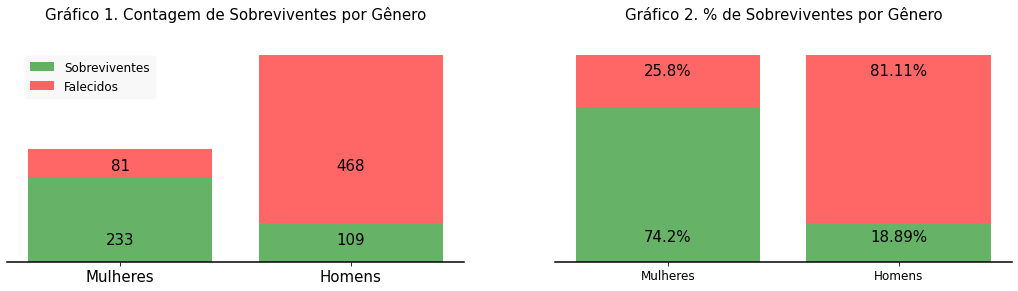

In [35]:
fig, (gra1, gra2) = plt.subplots(1, 2, figsize=(18, 4))
# Gráfico 1 representará a quantidade ordinal de pessoas que sobreviveram em relação ao seu gênero (Sexo)
gra1.bar(range(len(genSurvived)), genSurvived, alpha=0.6, color='g')
gra1.bar(range(len(genDead)), genDead, alpha=0.6, color='r', bottom=genSurvived)
plt.sca(gra1), plt.xticks([0,1], ['Mulheres', 'Homens'], fontsize=12)
plt.legend(['Sobreviventes', 'Falecidos'], borderpad = 0.5, labelspacing = 0.5, edgecolor = 'w', facecolor = 'gray', framealpha = 0.05,
           fontsize=12, loc=0, bbox_to_anchor=(0.338,0.98))
gra1.set_xlabel(''), ax.set_ylabel('', fontsize=15)
gra1.tick_params(axis='y', labelleft=False, left=None), gra1.tick_params(axis='x', labelsize=15)
gra1.set_title('Gráfico 1. Contagem de Sobreviventes por Gênero', fontsize=15, pad=25)
gra1.spines['bottom'].set_linewidth(1.5) 
# Gráfico 2 representará a porcentagem de sobreviventes e falecidos em relação ao gênero
gra2.bar(range(len(percGenSurvived)), percGenSurvived, alpha=0.6, color='g')
gra2.bar(range(len(percGenDead)), percGenDead, alpha=0.6, color='r', bottom=percGenSurvived)
plt.sca(gra2), plt.xticks([0,1], ['Mulheres', 'Homens'], fontsize=12)
gra2.set_xlabel(''), ax.set_ylabel('', fontsize=15)
gra2.tick_params(axis='y', labelleft=False, left=None), gra1.tick_params(axis='x', labelsize=15)
gra2.set_title('Gráfico 2. % de Sobreviventes por Gênero', fontsize=15, pad=25)
gra2.spines['bottom'].set_linewidth(1.5)

for l in range(2):
    gra1.annotate(genDead[l], (l, tWoman-60), ha='center', fontsize=15)
    gra1.annotate(genSurvived[l], (l, 50), ha='center', fontsize=15)
    gra2.annotate(f'{percGenDead[l]}%', (l, 90), ha='center', fontsize=15)
    gra2.annotate(f'{percGenSurvived[l]}%', (l, 10), ha='center', fontsize=15)

for axis in ['top', 'right', 'left']:    
    gra1.spines[axis].set_color(None)
    gra2.spines[axis].set_color(None)
plt.show()

***
**Fica nítido que o gênero do passageiro influenciou diretamente na chance de sobrevivência, uma vez que aproximadamente 75% das mulheres sobreviveram à tragédia contra apenas 18% dos homens, conforme evidenciado no Gráfico 2.**
***

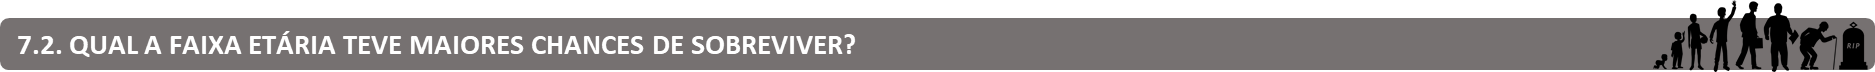

> Haviam algumas crianças e idosos a bordo, vamos verificar a chance de sobrevivência desses grupos de passageiros.

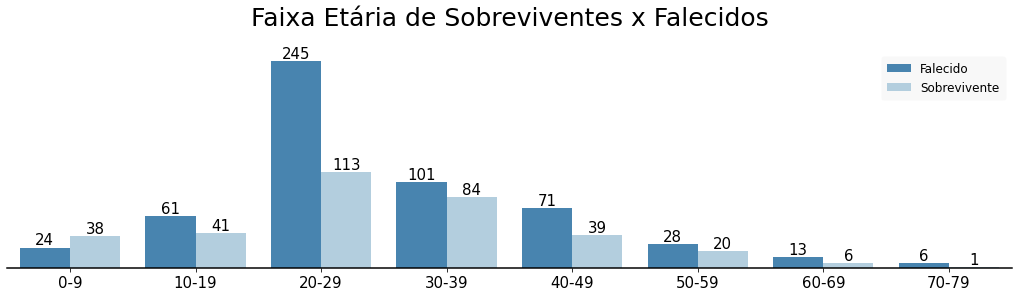

In [36]:
#Plotagem do gráfico de Faixa Etária
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot('RangeAge', hue='Survived', data=dfTitanic, palette='Blues_r')
ax.legend(['Falecido', 'Sobrevivente'], borderpad = 0.5, labelspacing = 0.5, edgecolor = 'w', facecolor = 'gray', framealpha = 0.05, fontsize=12)
ax.set_xlabel(''), ax.set_ylabel('', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=15)
x_ticks_labels = ['Falecido','Sobrevivente']
ax.set_title('Faixa Etária de Sobreviventes x Falecidos', fontsize=25, pad=25)
ax.spines['bottom'].set_linewidth(1.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate(i.get_height().astype(int),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,3),
    textcoords='offset points', fontsize=15)        
plt.show()

***
**Observa-se que as crianças tiveram mais chances de sobreviver do que qualquer outra faixa etária. Já as pessoas com mais de 70 anos, provavelmente por conta de suas condições físicas, não tiveram a menor chance de sobreviver ao desastre. De igual modo como fizemos com a visualização dos gráficos por gênero, faremos logo à seguir para a faixa etária.**
***


In [37]:
# Declaração e atribuição de variáveis para faciliar a manipulação dos dados na célula seguinte
rangeAgeSurvived = survived.groupby(['RangeAge']).size().values
rangeAgeDead = dead.groupby(['RangeAge']).size().values
total = rangeAgeSurvived + rangeAgeDead
percRangeAgeSurvived = np.round((rangeAgeSurvived / total) * 100, 1)
percRangeAgeDead = np.round((rangeAgeDead / total) * 100, 1)

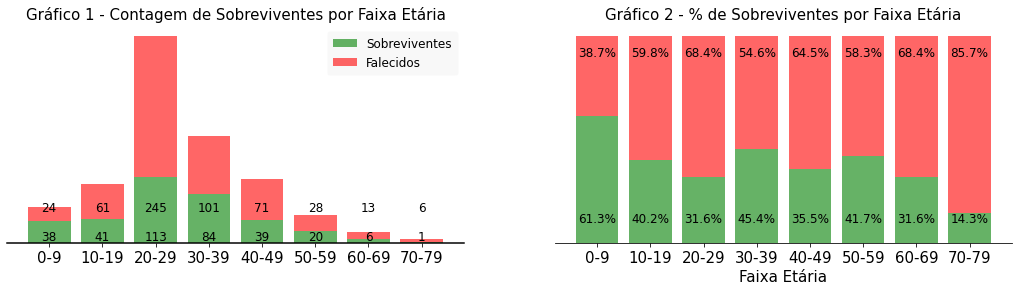

In [38]:
fig, (gra1, gra2) = plt.subplots(1, 2, figsize=(18, 4))
# Gráfico 1 representará a quantidade ordinal de pessoas que sobreviveram em relação à faixa etária
gra1.bar(range(len(rangeAgeSurvived)), rangeAgeSurvived, alpha=0.6, color='g')
gra1.bar(range(len(rangeAgeDead)), rangeAgeDead, bottom=rangeAgeSurvived, alpha=0.6, color='r')
plt.sca(gra1),  gra1.set_ylabel('', fontsize=15), gra1.set_xlabel('Faixa Etária', fontsize=15)
gra1.set_title('Gráfico 1 - Contagem de Sobreviventes por Faixa Etária', fontsize=15)
plt.xticks(np.array(range(len(rangeIdade))), rangeIdade)
plt.legend(['Sobreviventes', 'Falecidos'], borderpad = 0.5, labelspacing = 0.5, edgecolor = 'w', facecolor = 'gray', framealpha = 0.05, fontsize=12)
gra1.set_xlabel(''), ax.set_ylabel('', fontsize=15)
gra1.tick_params(axis='y', labelleft=False, left=None), gra1.tick_params(axis='x', labelsize=15)
gra1.spines['bottom'].set_linewidth(1.5) 
# Gráfico 2 representará a porcentagem de sobreviventes e falecidos em relação à faixa etária
gra2.bar(range(len(percRangeAgeSurvived)),percRangeAgeSurvived, alpha=0.6, color='g')
gra2.bar(range(len(percRangeAgeDead)), percRangeAgeDead, bottom=percRangeAgeSurvived, alpha=0.6, color='r')
plt.sca(gra2), gra2.set_ylabel('', fontsize=15), gra2.set_xlabel('Faixa Etária', fontsize=15)
gra2.set_title('Gráfico 2 - % de Sobreviventes por Faixa Etária', fontsize=15)
plt.xticks(np.array(range(len(rangeIdade))), rangeIdade)
gra2.tick_params(axis='y', labelleft=False, left=None), gra2.tick_params(axis='x', labelsize=15)

for l in range(8):
    gra1.annotate(rangeAgeDead[l], (l, 55), ha='center', fontsize=12)
    gra1.annotate(rangeAgeSurvived[l], (l, 5), ha='center', fontsize=12)
    gra2.annotate(f'{percRangeAgeDead[l]}%', (l, 90), ha='center', fontsize=12)
    gra2.annotate(f'{percRangeAgeSurvived[l]}%', (l, 10), ha='center', fontsize=12)

for axis in ['top', 'right', 'left']:    
    gra1.spines[axis].set_color(None)
    gra2.spines[axis].set_color(None)
plt.show()

***
**Fica evidenciado então o comentado acima. Os gráficos mostram claramente que as crianças foram as que tiveram maior chance de sobrevivência, seguidas das pessoas com idade entre 30 e 39 anos. outro lado as pessoas que menos chances tiveram são os idosos com idade acima de 70 anos.**
***

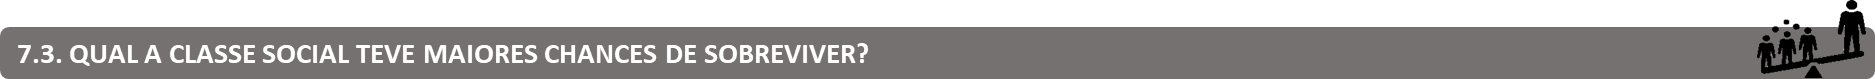

> Vamos verificar se a classe influencia diretamente na chance de sobrevivência do passageiro.

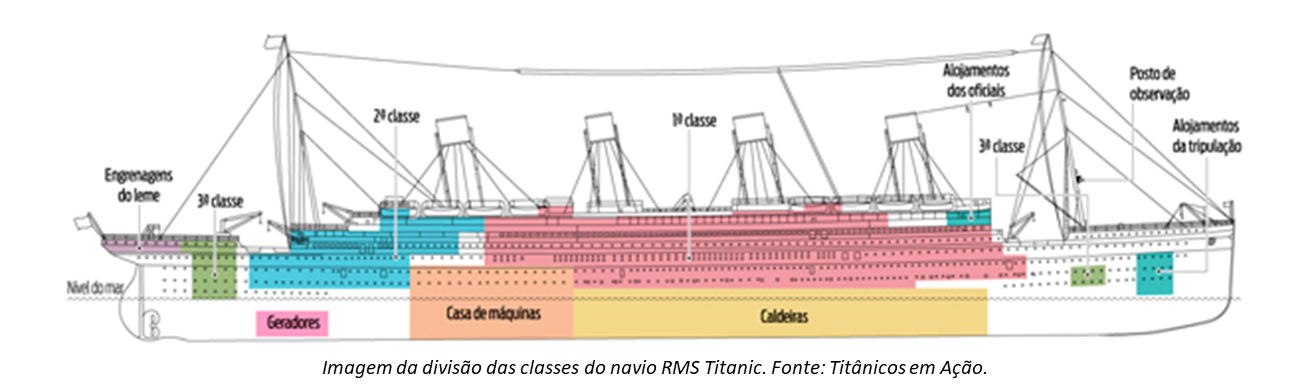

In [39]:
# Exibição das tabelas com a quantidade e a porcentagem de sobreviventes por classe
display(pd.crosstab(dfTitanic.Survived, dfTitanic.Pclass))
display(dfTitanic.groupby('Pclass').Survived.mean()*100)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [40]:
# Declaração e atribuição de variáveis para faciliar a manipulação dos dados na célula seguinte
classSurvived = survived.groupby(['Pclass']).size().values
classDead = dead.groupby(['Pclass']).size().values
total = classSurvived + classDead
percClassSurvived = np.round((classSurvived / total) * 100,2)
percClasseDead = np.round((classDead / total) * 100,2)

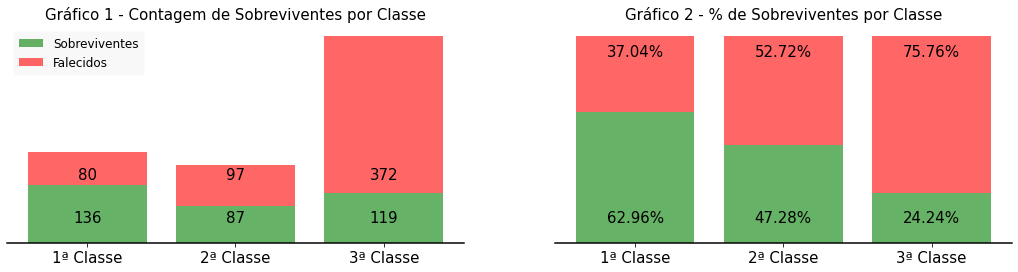

In [41]:
fig, (gra1, gra2) = plt.subplots(1, 2, figsize=(18, 4))
# Gráfico 1 representará a quantidade ordinal de pessoas que sobreviveram em relação à classe
gra1.bar(range(len(classSurvived)), classSurvived, alpha=0.6, color='g')
gra1.bar(range(len(classDead)), classDead, bottom=classSurvived, alpha=0.6, color='r')
plt.sca(gra1),  gra1.set_ylabel('', fontsize=15), gra1.set_xlabel('Classe', fontsize=15)
gra1.set_title('Gráfico 1 - Contagem de Sobreviventes por Classe', fontsize=15)
plt.legend(['Sobreviventes', 'Falecidos'], borderpad = 0.5, labelspacing = 0.5, edgecolor = 'w', facecolor = 'gray', framealpha = 0.05, fontsize=12)
plt.xticks([0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'], fontsize=15)
gra1.set_xlabel(''), ax.set_ylabel('', fontsize=15)
gra1.tick_params(axis='y', labelleft=False, left=None), gra1.tick_params(axis='x', labelsize=15)
gra1.spines['bottom'].set_linewidth(1.5)
# Gráfico 2 representará a porcentagem de sobreviventes e falecidos em relação à classe
gra2.bar(range(len(percClassSurvived)), percClassSurvived, alpha=0.6, color='g')
gra2.bar(range(len(percClasseDead)), percClasseDead, bottom=percClassSurvived, alpha=0.6, color='r')
plt.sca(gra2),  gra2.set_ylabel('', fontsize=15), gra2.set_xlabel('Classe', fontsize=15)
gra2.set_title('Gráfico 2 - % de Sobreviventes por Classe', fontsize=15)
plt.xticks([0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'], fontsize=15)
gra2.set_xlabel(''), ax.set_ylabel('', fontsize=15)
gra2.tick_params(axis='y', labelleft=False, left=None), gra2.tick_params(axis='x', labelsize=15)
gra2.spines['bottom'].set_linewidth(1.5)  

for axis in ['top', 'right', 'left']:    
    gra1.spines[axis].set_color(None)
    gra2.spines[axis].set_color(None)
    
for l in range(3):
    gra1.annotate(classDead[l], (l, 150), ha='center', fontsize=15)
    gra1.annotate(classSurvived[l], (l, 50), ha='center', fontsize=15)
    gra2.annotate(f'{percClasseDead[l]}%', (l, 90), ha='center', fontsize=15)
    gra2.annotate(f'{percClassSurvived[l]}%', (l, 10), ha='center', fontsize=15)    
plt.show()

***
**De acordo com o exposto no Gráfico 2, podemos reparar que a classe foi um fator determinante para a sobrevivência do passageiro. Em que pese o navio ter começado a afundar pela proa, local mais próximo da 1ª classe, podemos reparar que os passageiros com um maior poder aquisitivo tiveram mais chances de sobreviver.**
***

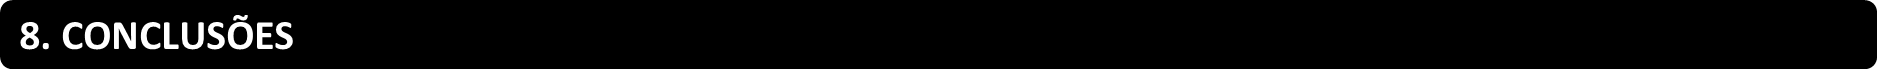

***
* O navio **RMS Titanic** colidiu com o iceberg no dia 14 de abril de 1912, na parta da proa, lateral direita, perto das 23h50. De acordo com relatos e documentários à 00h20 a tripulação começou a colocar mulheres e crianças nos poucos botes salva vidas que haviam disponíveis (por considerarem o navio "inafundável" os projetistas optaram por deixar o navio mais aparentemente agradável em detrimento à segurança).

> Isso explica a grande diferença na relação de sobreviventes por Sexo e Faixa Etária.

* Os compartimentos da frente do navio encheram de água por volta das 02h05, fazendo a proa afundar e a popa elevar acima do nível da água. 15 minutos depois o navio partiu-se em dois, sendo que a proa afundou primeiro, seguida da popa alguns minutos depois.

> Apesar da 1ª classe estar mais próxima do ponto crítico do navio e a proa, local no qual começavam a distribuilçao das cabines da 1ª classe, afundar primeiro, as pessoas com um maior "poder aquisitivo" tiveram mais chances de sobreviver.

* O Dataset possui algumas limitações:

> 1. Valores ausentes para as variáveis '*Cabin*', '*Age*' e '*Embarked*' podem prejudicar a análise exploratória dos dados.
> 1. Trata-se apenas de uma amostra, a quantidade total de passageiros do navio era mais de 2.000 pessoas. Tal amostra representa aproximadamente 40% dos dados totais.

* Em que pese as limitações do *Dataset*, acredito que os resultados disponibilizados aqui, por meio da análise exploratória dos dados, foram plenamente satisfatórios.
***

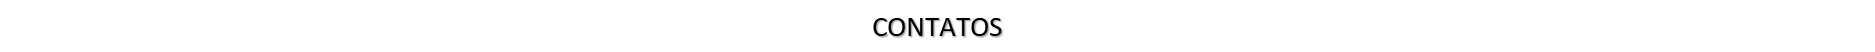

|   Github	| Linkedin   	| Kaggle    	|   E-mail	|
|---	|---	|---	|---	|
|   [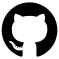](https://github.com/ThiagoFerreiraWD)	|   [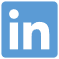](https://www.linkedin.com/in/tferreirasilva)	|   [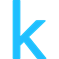](https://www.kaggle.com/thiagoferreirasilva)	|   [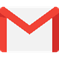](mailto:thiago.ferreirawd@gmail.com)	|